In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm_notebook

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

%matplotlib inline

In [2]:
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

In [3]:
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


1а получаем векторы жанров

In [4]:
def change_string(s):
    return ' '.join(s.replace(' ', '').replace('-', '').split('|'))

In [5]:
movie_genres = [change_string(g) for g in movies.genres.values]

In [6]:
movie_genres

['Adventure Animation Children Comedy Fantasy',
 'Adventure Children Fantasy',
 'Comedy Romance',
 'Comedy Drama Romance',
 'Comedy',
 'Action Crime Thriller',
 'Comedy Romance',
 'Adventure Children',
 'Action',
 'Action Adventure Thriller',
 'Comedy Drama Romance',
 'Comedy Horror',
 'Adventure Animation Children',
 'Drama',
 'Action Adventure Romance',
 'Crime Drama',
 'Drama Romance',
 'Comedy',
 'Comedy',
 'Action Comedy Crime Drama Thriller',
 'Comedy Crime Thriller',
 'Crime Drama Horror Mystery Thriller',
 'Action Crime Thriller',
 'Drama SciFi',
 'Drama Romance',
 'Drama',
 'Children Drama',
 'Drama Romance',
 'Adventure Drama Fantasy Mystery SciFi',
 'Crime Drama',
 'Drama',
 'Mystery SciFi Thriller',
 'Children Drama',
 'Crime Drama',
 'Children Comedy',
 'Comedy Romance',
 'Drama',
 'Drama War',
 'Action Crime Drama',
 'Drama',
 'Action Adventure Fantasy',
 'Comedy Drama Thriller',
 'Drama Romance',
 'Mystery Thriller',
 'Animation Children Drama Musical Romance',
 'Drama R

In [7]:
tfidf_vectorizer_genres = TfidfVectorizer()
X_train_tfidf_genres = tfidf_vectorizer_genres.fit_transform(movie_genres)
# X_train_tfidf_genres.toarray()
# len(X_train_tfidf_genres.toarray())
# X_train_tfidf_genres

In [8]:
# векторы жанров
tfidfs_on_genre = X_train_tfidf_genres.toarray()
tfidfs_on_genre

array([[0.        , 0.41684567, 0.51622547, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.51236121, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.57860574, 0.        , 0.81560738, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

item-to-item by genre

In [9]:
neigh_genre = NearestNeighbors(n_neighbors=7, n_jobs=-1, metric='euclidean')
neigh_genre.fit(X_train_tfidf_genres)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='euclidean',
                 metric_params=None, n_jobs=-1, n_neighbors=7, p=2, radius=1.0)

In [10]:
test_tag = change_string("Adventure|Comedy|Fantasy|Crime")
X_test_tfidf_genres = tfidf_vectorizer_genres.transform([test_tag])
X_test_tfidf_genres.toarray()

array([[0.        , 0.51372903, 0.        , 0.        , 0.32977898,
        0.52250315, 0.        , 0.        , 0.59524681, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

In [11]:
res_genre = neigh_genre.kneighbors(X_test_tfidf_genres, return_distance=True)
res_genre

(array([[0.42079615, 0.53300564, 0.54288608, 0.54288608, 0.54288608,
         0.54288608, 0.54288608]]),
 array([[6774, 9096, 5636, 6723, 3376, 7496, 9717]], dtype=int64))

In [12]:
movies.iloc[res_genre[1][0]]

,movieId,title,genres
6774,60074,Hancock (2008),Action|Adventure|Comedy|Crime|Fantasy
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy
5636,27368,Asterix & Obelix: Mission Cleopatra (Astérix &...,Adventure|Comedy|Fantasy
6723,58972,Nim's Island (2008),Adventure|Comedy|Fantasy
3376,4591,Erik the Viking (1989),Adventure|Comedy|Fantasy
7496,82854,Gulliver's Travels (2010),Adventure|Comedy|Fantasy
9717,188833,The Man Who Killed Don Quixote (2018),Adventure|Comedy|Fantasy


1б получаем векторы тегов

In [13]:
tags.head(20)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
5,2,89774,Tom Hardy,1445715205
6,2,106782,drugs,1445715054
7,2,106782,Leonardo DiCaprio,1445715051
8,2,106782,Martin Scorsese,1445715056
9,7,48516,way too long,1169687325


In [14]:
movies_join_tags = movies.join(tags.set_index('movieId'), on='movieId')

In [15]:
# movies_join_tags

In [16]:
movies_join_tags.tag.unique().shape

(1590,)

In [17]:
tag_strings = []

for movie, group in movies_join_tags.sort_values('movieId').groupby('movieId'):
    tag_strings.append(' '.join([str(s).replace(' ', '').replace('-', '') for s in group.tag.values]))

In [18]:
tag_strings

['pixar pixar fun',
 'fantasy magicboardgame RobinWilliams game',
 'moldy old',
 'nan',
 'remake pregnancy',
 'nan',
 'remake',
 'nan',
 'nan',
 'nan',
 'politics president',
 'nan',
 'nan',
 'politics president',
 'nan',
 'Mafia',
 'JaneAusten',
 'nan',
 'nan',
 'nan',
 'Hollywood',
 'serialkiller',
 'nan',
 'nan',
 'alcoholism',
 'Shakespeare',
 'nan',
 'InNetflixqueue JaneAusten',
 'kidnapping',
 'nan',
 'highschool teacher',
 'twistending timetravel remake postapocalyptic Postapocalyptic mindfuck BruceWillis BradPitt timetravel timetravel',
 'Animalmovie pigs villainnonexistentornotneededforgoodstory',
 'deathpenalty Nun',
 'twins',
 'JaneAusten Emma seenmorethanonce chickflick PaulRudd funny quotable',
 'InNetflixqueue SouthAfrica',
 'Shakespeare',
 'nan',
 'England',
 'nan',
 'Journalism',
 'wedding',
 'mystery twistending serialkiller',
 'nan',
 'nan',
 'heist twistending tricky suspense mindfuck thriller',
 'adoption prostitution',
 'nan',
 'nan',
 'nan',
 'nan',
 'writing',
 '

In [19]:
tfidf_vectorizer_tags = TfidfVectorizer()
X_train_tfidf_tags = tfidf_vectorizer_tags.fit_transform(tag_strings)
# X_train_tfidf_tags.toarray()
# len(X_train_tfidf_tags.toarray())
# X_train_tfidf_tags

In [20]:
# векторы тегов
tfidfs_on_tag = X_train_tfidf_tags.toarray()
tfidfs_on_tag

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

item-to-item by tag

In [21]:
neigh_tag = NearestNeighbors(n_neighbors=7, n_jobs=-1, metric='euclidean')
neigh_tag.fit(X_train_tfidf_tags)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='euclidean',
                 metric_params=None, n_jobs=-1, n_neighbors=7, p=2, radius=1.0)

In [22]:
test_tag = change_string("pixar pixar fun")
X_train_tfidf_tags = tfidf_vectorizer_tags.transform([test_tag])
X_train_tfidf_tags.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [23]:
res_tag = neigh_tag.kneighbors(X_train_tfidf_tags, return_distance=True)
res_tag

(array([[0., 0., 1., 1., 1., 1., 1.]]),
 array([[4294, 2382, 8912, 4305, 8693, 6609,  322]], dtype=int64))

In [24]:
movies.iloc[res_tag[1][0]]

,movieId,title,genres
4294,6273,In a Lonely Place (1950),Drama|Film-Noir|Mystery|Romance
2382,3160,Magnolia (1999),Drama
8912,135518,Self/less (2015),Action|Mystery|Sci-Fi|Thriller
4305,6291,Lilya 4-Ever (Lilja 4-ever) (2002),Crime|Drama
8693,122912,Avengers: Infinity War - Part I (2018),Action|Adventure|Sci-Fi
6609,55765,American Gangster (2007),Crime|Drama|Thriller
322,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX


2а добавляем векторы жанров

In [25]:
tfidfs_on_genre.shape[1]

20

In [26]:
tfidf_vectorizer_genres.vocabulary_

{'adventure': 1,
 'animation': 2,
 'children': 3,
 'comedy': 4,
 'fantasy': 8,
 'romance': 15,
 'drama': 7,
 'action': 0,
 'crime': 5,
 'thriller': 17,
 'horror': 10,
 'mystery': 13,
 'scifi': 16,
 'war': 18,
 'musical': 12,
 'documentary': 6,
 'imax': 11,
 'western': 19,
 'filmnoir': 9,
 'nogenreslisted': 14}

In [27]:
dict_genres = tfidf_vectorizer_genres.vocabulary_
dict_genres.keys()

dict_keys(['adventure', 'animation', 'children', 'comedy', 'fantasy', 'romance', 'drama', 'action', 'crime', 'thriller', 'horror', 'mystery', 'scifi', 'war', 'musical', 'documentary', 'imax', 'western', 'filmnoir', 'nogenreslisted'])

In [28]:
moviess = pd.read_csv('movies.csv')

In [29]:
# добавляем векторы жанров
for x in range(tfidfs_on_genre.shape[1]):
    col_name = list(dict_genres.keys())[x]
    moviess[col_name] = pd.Series(tfidfs_on_genre[:, x])

In [30]:
moviess

,movieId,title,genres,adventure,animation,children,comedy,fantasy,romance,drama,...,horror,mystery,scifi,war,musical,documentary,imax,western,filmnoir,nogenreslisted
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.000000,0.416846,0.516225,0.504845,0.267586,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0.000000,0.512361,0.000000,0.620525,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0.000000,0.000000,0.000000,0.000000,0.570915,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.821009,0.000000,0.000000,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0.000000,0.000000,0.000000,0.000000,0.505015,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.726241,0.000000,0.000000,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
5,6,Heat (1995),Action|Crime|Thriller,0.549328,0.000000,0.000000,0.000000,0.000000,0.635947,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.542042,0.0,0.0
6,7,Sabrina (1995),Comedy|Romance,0.000000,0.000000,0.000000,0.000000,0.570915,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.821009,0.000000,0.000000,0.0,0.0
7,8,Tom and Huck (1995),Adventure|Children,0.000000,0.636699,0.000000,0.771112,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
8,9,Sudden Death (1995),Action,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
9,10,GoldenEye (1995),Action|Adventure|Thriller,0.553065,0.629522,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.545730,0.0,0.0


2б добавляем векторы тегов

In [31]:
tfidfs_on_tag.shape[1]

1473

In [32]:
tfidf_vectorizer_tags.vocabulary_

{'pixar': 1015,
 'fun': 516,
 'fantasy': 476,
 'magicboardgame': 814,
 'robinwilliams': 1118,
 'game': 523,
 'moldy': 878,
 'old': 969,
 'nan': 913,
 'remake': 1095,
 'pregnancy': 1042,
 'politics': 1027,
 'president': 1045,
 'mafia': 811,
 'janeausten': 715,
 'hollywood': 625,
 'serialkiller': 1174,
 'alcoholism': 42,
 'shakespeare': 1184,
 'innetflixqueue': 672,
 'kidnapping': 758,
 'highschool': 615,
 'teacher': 1313,
 'twistending': 1385,
 'timetravel': 1346,
 'postapocalyptic': 1034,
 'mindfuck': 866,
 'brucewillis': 213,
 'bradpitt': 200,
 'animalmovie': 73,
 'pigs': 1014,
 'villainnonexistentornotneededforgoodstory': 1418,
 'deathpenalty': 370,
 'nun': 961,
 'twins': 1382,
 'emma': 436,
 'seenmorethanonce': 1170,
 'chickflick': 256,
 'paulrudd': 999,
 'funny': 518,
 'quotable': 1070,
 'southafrica': 1231,
 'england': 443,
 'journalism': 745,
 'wedding': 1438,
 'mystery': 909,
 'heist': 604,
 'tricky': 1373,
 'suspense': 1302,
 'thriller': 1342,
 'adoption': 28,
 'prostitution': 

In [62]:
dict_tags = tfidf_vectorizer_tags.vocabulary_
# dict_tags.keys()

In [34]:
# добавляем векторы тегов
# for x in range(tfidfs_on_tag.shape[1]):
#     col_name = list(dict_tags.keys())[x]
#     moviess[col_name] = pd.Series(tfidfs_on_tag[:, x])

In [35]:
# moviess

,movieId,title,genres,adventure,animation,children,comedy,fantasy,romance,drama,...,horror,mystery,scifi,war,musical,documentary,imax,western,filmnoir,nogenreslisted
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.000000,0.416846,0.516225,0.504845,0.267586,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0.000000,0.512361,0.000000,0.620525,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0.000000,0.000000,0.000000,0.000000,0.570915,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.821009,0.000000,0.000000,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0.000000,0.000000,0.000000,0.000000,0.505015,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.726241,0.000000,0.000000,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
5,6,Heat (1995),Action|Crime|Thriller,0.549328,0.000000,0.000000,0.000000,0.000000,0.635947,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.542042,0.0,0.0
6,7,Sabrina (1995),Comedy|Romance,0.000000,0.000000,0.000000,0.000000,0.570915,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.821009,0.000000,0.000000,0.0,0.0
7,8,Tom and Huck (1995),Adventure|Children,0.000000,0.636699,0.000000,0.771112,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
8,9,Sudden Death (1995),Action,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
9,10,GoldenEye (1995),Action|Adventure|Thriller,0.553065,0.629522,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.545730,0.0,0.0


дополнительные фичи фильма

In [36]:
movies_join_ratings = movies.join(ratings.set_index('movieId'), on='movieId')
movies_join_ratings

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1.106636e+09
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1.510578e+09
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1.305696e+09
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18.0,3.5,1.455210e+09
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19.0,4.0,9.657056e+08
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,21.0,3.5,1.407619e+09
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,27.0,3.0,9.626853e+08
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31.0,5.0,8.504666e+08


In [37]:
sum_rating_by_movies = movies_join_ratings.groupby(['movieId'])[['rating']].sum().sort_values('movieId')
sum_rating_by_movies = sum_rating_by_movies.reset_index()
sum_rating_by_movies

,movieId,rating
0,1,843.0
1,2,377.5
2,3,169.5
3,4,16.5
4,5,150.5
5,6,402.5
6,7,172.0
7,8,23.0
8,9,50.0
9,10,461.5


In [38]:
count_rating_by_movies = movies_join_ratings.groupby(['movieId'])[['rating']].count().sort_values('movieId')
count_rating_by_movies = count_rating_by_movies.reset_index()
count_rating_by_movies

,movieId,rating
0,1,215
1,2,110
2,3,52
3,4,7
4,5,49
5,6,102
6,7,54
7,8,8
8,9,16
9,10,132


In [39]:
avg_rating_by_movies = movies_join_ratings.groupby(['movieId'])[['rating']].mean().sort_values('movieId')
avg_rating_by_movies = avg_rating_by_movies.reset_index()
avg_rating_by_movies

,movieId,rating
0,1,3.920930
1,2,3.431818
2,3,3.259615
3,4,2.357143
4,5,3.071429
5,6,3.946078
6,7,3.185185
7,8,2.875000
8,9,3.125000
9,10,3.496212


In [40]:
# добавляем rating, count, mean
moviess['sum'] = sum_rating_by_movies['rating']
moviess['count'] = count_rating_by_movies['rating']
moviess['mean'] = avg_rating_by_movies['rating']

moviess

,movieId,title,genres,adventure,animation,children,comedy,fantasy,romance,drama,...,war,musical,documentary,imax,western,filmnoir,nogenreslisted,sum,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.000000,0.416846,0.516225,0.504845,0.267586,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,843.0,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,0.000000,0.512361,0.000000,0.620525,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,377.5,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,0.000000,0.000000,0.000000,0.000000,0.570915,0.000000,0.0,...,0.000000,0.0,0.821009,0.000000,0.000000,0.0,0.0,169.5,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0.000000,0.000000,0.000000,0.000000,0.505015,0.000000,0.0,...,0.000000,0.0,0.726241,0.000000,0.000000,0.0,0.0,16.5,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,150.5,49,3.071429
5,6,Heat (1995),Action|Crime|Thriller,0.549328,0.000000,0.000000,0.000000,0.000000,0.635947,0.0,...,0.000000,0.0,0.000000,0.000000,0.542042,0.0,0.0,402.5,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,0.000000,0.000000,0.000000,0.000000,0.570915,0.000000,0.0,...,0.000000,0.0,0.821009,0.000000,0.000000,0.0,0.0,172.0,54,3.185185
7,8,Tom and Huck (1995),Adventure|Children,0.000000,0.636699,0.000000,0.771112,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,23.0,8,2.875000
8,9,Sudden Death (1995),Action,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,50.0,16,3.125000
9,10,GoldenEye (1995),Action|Adventure|Thriller,0.553065,0.629522,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.545730,0.0,0.0,461.5,132,3.496212


In [41]:
moviess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 26 columns):
movieId           9742 non-null int64
title             9742 non-null object
genres            9742 non-null object
adventure         9742 non-null float64
animation         9742 non-null float64
children          9742 non-null float64
comedy            9742 non-null float64
fantasy           9742 non-null float64
romance           9742 non-null float64
drama             9742 non-null float64
action            9742 non-null float64
crime             9742 non-null float64
thriller          9742 non-null float64
horror            9742 non-null float64
mystery           9742 non-null float64
scifi             9742 non-null float64
war               9742 non-null float64
musical           9742 non-null float64
documentary       9742 non-null float64
imax              9742 non-null float64
western           9742 non-null float64
filmnoir          9742 non-null float64
nogenreslisted   

In [42]:
moviess_join_ratings = ratings.join(moviess.set_index('movieId'), on='movieId')

In [43]:
# moviess_join_ratings

In [44]:
# выбираем фильмы для пользователя 1
moviess_users1 = moviess_join_ratings[moviess_join_ratings['userId']==1]
moviess_users1

,userId,movieId,rating,timestamp,title,genres,adventure,animation,children,comedy,...,war,musical,documentary,imax,western,filmnoir,nogenreslisted,sum,count,mean
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.000000,0.416846,0.516225,0.504845,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,843.0,215,3.920930
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.821009,0.000000,0.000000,0.000000,0.000000,169.5,52,3.259615
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,0.549328,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.542042,0.000000,0.000000,402.5,102,3.946078
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,0.000000,0.000000,0.000000,0.000000,...,0.823735,0.0,0.000000,0.000000,0.566975,0.000000,0.000000,807.0,203,3.975369
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,0.000000,0.000000,0.000000,0.000000,...,0.685854,0.0,0.000000,0.000000,0.472071,0.000000,0.000000,864.5,204,4.237745
5,1,70,3.0,964982400,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller,0.498143,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.491536,0.000000,0.000000,193.0,55,3.509091
6,1,101,5.0,964980868,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance,0.000000,0.550590,0.000000,0.000000,...,0.000000,0.0,0.508269,0.000000,0.000000,0.000000,0.000000,87.0,23,3.782609
7,1,110,4.0,964982176,Braveheart (1995),Action|Drama|War,0.502044,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.795724,0.000000,955.5,237,4.031646
8,1,151,5.0,964984041,Rob Roy (1995),Action|Drama|Romance|War,0.444047,0.000000,0.000000,0.000000,...,0.000000,0.0,0.466582,0.000000,0.000000,0.703800,0.000000,156.0,44,3.545455
9,1,157,5.0,964984100,Canadian Bacon (1995),Comedy|War,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.908145,0.000000,31.5,11,2.863636


In [45]:
y = moviess_users1['rating']
y

0      4.0
1      4.0
2      4.0
3      5.0
4      5.0
5      3.0
6      5.0
7      4.0
8      5.0
9      5.0
10     5.0
11     5.0
12     3.0
13     5.0
14     4.0
15     5.0
16     3.0
17     3.0
18     5.0
19     4.0
20     4.0
21     5.0
22     4.0
23     3.0
24     4.0
25     5.0
26     4.0
27     3.0
28     5.0
29     4.0
      ... 
202    4.0
203    5.0
204    4.0
205    1.0
206    3.0
207    3.0
208    5.0
209    5.0
210    5.0
211    4.0
212    4.0
213    5.0
214    5.0
215    5.0
216    4.0
217    4.0
218    4.0
219    5.0
220    4.0
221    4.0
222    5.0
223    5.0
224    5.0
225    5.0
226    4.0
227    4.0
228    5.0
229    4.0
230    4.0
231    5.0
Name: rating, Length: 232, dtype: float64

In [46]:
del moviess_users1['rating']
del moviess_users1['userId']
del moviess_users1['timestamp']
del moviess_users1['title']
del moviess_users1['genres']
# moviess_users1

In [47]:
del moviess_users1['movieId']

In [48]:
moviess_users1

,adventure,animation,children,comedy,fantasy,romance,drama,action,crime,thriller,...,war,musical,documentary,imax,western,filmnoir,nogenreslisted,sum,count,mean
0,0.000000,0.416846,0.516225,0.504845,0.267586,0.000000,0.0,0.000000,0.482990,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,843.0,215,3.920930
1,0.000000,0.000000,0.000000,0.000000,0.570915,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.821009,0.000000,0.000000,0.000000,0.000000,169.5,52,3.259615
2,0.549328,0.000000,0.000000,0.000000,0.000000,0.635947,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.542042,0.000000,0.000000,402.5,102,3.946078
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.823735,0.0,0.000000,0.000000,0.566975,0.000000,0.000000,807.0,203,3.975369
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.553854,0.0,0.000000,0.000000,0.0,...,0.685854,0.0,0.000000,0.000000,0.472071,0.000000,0.000000,864.5,204,4.237745
5,0.498143,0.000000,0.000000,0.000000,0.363979,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.491536,0.000000,0.000000,193.0,55,3.509091
6,0.000000,0.550590,0.000000,0.000000,0.353441,0.559994,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.508269,0.000000,0.000000,0.000000,0.000000,87.0,23,3.782609
7,0.502044,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.338784,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.795724,0.000000,955.5,237,4.031646
8,0.444047,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.299647,0.000000,0.0,...,0.000000,0.0,0.466582,0.000000,0.000000,0.703800,0.000000,156.0,44,3.545455
9,0.000000,0.000000,0.000000,0.000000,0.418656,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.908145,0.000000,31.5,11,2.863636


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(moviess_users1, y, test_size=0.2, random_state=42)

In [50]:
# from sklearn.preprocessing import StandardScaler

In [51]:
# scaler = StandardScaler()

In [52]:
# X_train = scaler.fit_transform(X_train)

In [53]:
# X_test = scaler.transform(X_test)

In [54]:
from sklearn import linear_model

In [55]:
model = linear_model.LinearRegression()

In [56]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [57]:
y_pred
# y_test

array([4.67128125, 4.26303028, 3.79836075, 3.24299725, 4.9093169 ,
       4.67378428, 4.49729125, 4.68928974, 4.23247278, 4.20897643,
       4.33568494, 4.20822531, 4.898686  , 4.8762716 , 4.25697525,
       4.86372823, 4.43095156, 4.0300407 , 3.77212873, 4.69837251,
       4.63703414, 4.83424784, 3.68981525, 5.19437445, 3.48802636,
       4.64475783, 5.05407297, 3.95366939, 4.1166568 , 4.44849452,
       4.63875261, 4.40613737, 4.30813054, 4.92803145, 4.54170415,
       4.89219642, 4.13676295, 3.98664331, 4.47140623, 4.55803028,
       4.32436741, 4.61797375, 3.62421825, 4.8371938 , 4.06265032,
       3.94659763, 4.09753505])

In [58]:
from sklearn.metrics import mean_squared_error

In [59]:
mean_squared_error(y_test, y_pred)

0.3761797276340137

In [60]:
from matplotlib import pyplot as plt

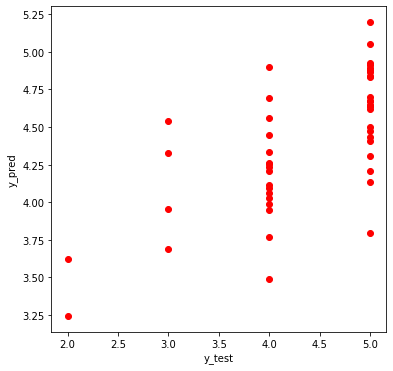

In [61]:
# сравним y_test и y_pred
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color = 'r')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()